##  Deep Neural Networks Project

In this project, you will be working with a real-world data set from the Las Vegas Metropolitan Police Department. The dataset  contains information about the reported incidents, including the time and location of the crime, type of incident, and number of persons involved.

The dataset is downloaded from the public docket at:
https://opendata-lvmpd.hub.arcgis.com

let's read the csv file and transform the data:

In [83]:
import torch
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [84]:
# orig_df = pd.read_csv('../../datasets/LVMPD-Stats.csv', parse_dates=['ReportedOn'])
orig_df = pd.read_csv('sample_data/LVMPD-Stats.csv', parse_dates=['ReportedOn'])
# !pwd
!ls sample_data

anscombe.json		     california_housing_train.csv  mnist_test.csv	  README.md
california_housing_test.csv  LVMPD-Stats.csv		   mnist_train_small.csv


In [85]:
# df = pd.read_csv('../../datasets/LVMPD-Stats.csv', parse_dates=['ReportedOn'],
#                  usecols = ['X', 'Y', 'ReportedOn',
#                             'Area_Command','NIBRSOffenseCode',
#                             'VictimCount' ] )
df = pd.read_csv('sample_data/LVMPD-Stats.csv', parse_dates=['ReportedOn'],
                 usecols = ['X', 'Y', 'ReportedOn',
                            'Area_Command','NIBRSOffenseCode',
                            'VictimCount' ] )
# # print(set(list(df['VictimCount'])))
# print(df['VictimCount'])
df['DayOfWeek'] = df['ReportedOn'].dt.day_name()
df['Time' ]     = df['ReportedOn'].dt.hour
# df['Time'] = pd.factorize(df['Time'])
# print((pd.factorize(df['Time'].head())))
df.drop(columns = 'ReportedOn', inplace=True)

In [86]:

df['X'] = df['X']
df['Y'] = df['Y']
df['Time'] = pd.factorize(df['Time'])[0]
df['DayOfWeek'] = pd.factorize(df['DayOfWeek'])[0]
df.Area_Command = pd.factorize(df['Area_Command'])[0]
df2=df[['X', 'Y', 'Area_Command', 'NIBRSOffenseCode',
       'DayOfWeek', 'Time','VictimCount']]
df.VictimCount = pd.factorize(df['VictimCount'])[0]
# print(df['VictimCount'])
df.NIBRSOffenseCode = pd.factorize(df['NIBRSOffenseCode'])[0]
df.dropna(inplace=True)

In [33]:
df= df[['X', 'Y', 'Area_Command', 'NIBRSOffenseCode',
       'DayOfWeek', 'Time','VictimCount']]

In [34]:
df.values.shape

(275, 7)

# Goal
The goal is to build a predictive model that is trained on the following data:
* latitude and longitude (location)
* Hour of the day
* Day of the week
* Area-of-command code: The police designation of the bureau of the operation.
* Classification code for the crime committed
  
The predicted variable is the number of persons involved in the accident.


## Task 1
* print a few rows of the values in the dataframe ``df`` and explain what each column of data means.
* identify the input and target variables
* what is the range of values in each column? Do you need to scale, shift or normalize your data?


In [35]:
print(df.head())


            X          Y  Area_Command  NIBRSOffenseCode  DayOfWeek  Time  \
0 -115.087518  36.216702             0                 0          0     0   
1 -115.240172  36.189693             1                 1          1     1   
2 -115.143088  36.181329             2                 1          2     0   
3 -115.225014  36.117633             3                 1          1     2   
4 -115.176708  36.095967             4                 1          1     3   

   VictimCount  
0            0  
1            0  
2            1  
3            2  
4            0  




*   Column 'X' is the longitude and 'Y' is the latitude of the location of the crime reported.
*   Column 'Area_Command' and 'NIBRSOffenseCode' is the code associated with the area provided in the dataset and NIBRoffense code in the dataset respectively.
*   Column 'DayOfWeek' and 'Time' is the code associated with the Day the crime was reported and the hour the crime was reported respectively.
*   Column 'VictimCount' is the number of victims.


*   Columns 'X','Y','Area_Command','NIBRSOffenseCode','DayOfWeek' and 'Time' are the input variables and 'VictimCount' is the target variable.


*   Column 'X': Range = (-116.0, -114.6255705)
Column 'Y': Range = (35.0684190000001, 37.0000000000001)
Column 'Area_Command': Range = (0, 11)
Column 'NIBRSOffenseCode': Range = (0, 2)
Column 'DayOfWeek': Range = (0, 6)
Column 'Time': Range = (0, 23)
Column 'VictimCount': Range = (0, 6)



*  









## Task 2

* Create two `DataLoader` objects for training and testing based on the input and output variables. Pick a reasonable batch size and verify the shape of data by iterating over the one dataset and printing the shape of the batched data.

In [92]:
from sklearn.model_selection import train_test_split
X = df[['X', 'Y', 'Area_Command', 'NIBRSOffenseCode', 'DayOfWeek', 'Time']].values
# print(X)
Y = df['VictimCount'].values
# print(Y)
X_tensor = torch.Tensor(X)
Y_tensor = torch.Tensor(Y)
# dataset = TensorDataset(X_tensor, Y_tensor)
# batch_size = 32
# train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(dataset, batch_size=batch_size)
# for batch in train_loader:
#     X_batch, Y_batch = batch
#     print("X_batch shape:", X_batch.shape)
#     print("Y_batch shape:", Y_batch.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X_tensor, Y_tensor, test_size=0.2)


batch_size = 32
train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)
for batch in train_loader:
    X_batch, Y_batch = batch
    print("X_batch shape:", X_batch.shape)
    print("Y_batch shape:", Y_batch.shape)

X_batch shape: torch.Size([32, 6])
Y_batch shape: torch.Size([32])
X_batch shape: torch.Size([32, 6])
Y_batch shape: torch.Size([32])
X_batch shape: torch.Size([32, 6])
Y_batch shape: torch.Size([32])
X_batch shape: torch.Size([32, 6])
Y_batch shape: torch.Size([32])
X_batch shape: torch.Size([32, 6])
Y_batch shape: torch.Size([32])
X_batch shape: torch.Size([32, 6])
Y_batch shape: torch.Size([32])
X_batch shape: torch.Size([28, 6])
Y_batch shape: torch.Size([28])


## Task 3
In this task you will try to predict number of crime victims as a **real number**. Therefore the machine learning problem is a **regression** problem.

* Define the proper loss function for this task
* what should the size of the predicted output be?
* explain your choice of architecture, including how many layers you will be using
* define an optimizer for training this model, choose a proper learning rate
* write a training loop that obtains a batch out of the  training data and calculates the forward and backward passes over the neural network. Call the optimizer to update the weights of the neural network.
* write a for loop that continues the training over a number of epochs. At the end of each epoch, calculate the ``MSE`` error on the test data and print it.
* is your model training well? Adjust the learning rate, hidden size of the network, and try different activation functions and number of layers to achieve the best accuracy and report it.



*   Mean Squared Error is the loss function. It is the average squared difference between your predicted values and the actual target values.
*  The size of the predicted output should be 1.
*   For this I am using an architecture with one input layer with same number of features of the data and hidden layer size starting with 32 and output layer with single neuron.
*   Starting with Adam optimizer which is widely used for regression models and learning rate with 0.001




In [119]:
import torch.nn as nn
import torch.optim as optim

class RegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

input_size=6
hidden_size=32
output_size=1
model = RegressionModel(input_size, hidden_size, output_size)

criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 10
batch_size = 32

for epoch in range(num_epochs):
    # model.train()
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = Y_train[i:i+batch_size]
        outputs = model(batch_X)
        # print(batch_y)
        loss = criterion(outputs, batch_y)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i//batch_size+1}], Loss: {loss.item():.4f}')



Epoch [1/10], Batch [1], Loss: 198.5449
Epoch [1/10], Batch [2], Loss: 33.4725
Epoch [1/10], Batch [3], Loss: 6.2477
Epoch [1/10], Batch [4], Loss: 53.1426
Epoch [1/10], Batch [5], Loss: 79.3142
Epoch [1/10], Batch [6], Loss: 59.7443
Epoch [1/10], Batch [7], Loss: 31.0171
Epoch [2/10], Batch [1], Loss: 9.8026
Epoch [2/10], Batch [2], Loss: 2.3819
Epoch [2/10], Batch [3], Loss: 8.6683
Epoch [2/10], Batch [4], Loss: 20.1609
Epoch [2/10], Batch [5], Loss: 27.5426
Epoch [2/10], Batch [6], Loss: 30.6500
Epoch [2/10], Batch [7], Loss: 21.0331
Epoch [3/10], Batch [1], Loss: 8.5871
Epoch [3/10], Batch [2], Loss: 3.8444
Epoch [3/10], Batch [3], Loss: 1.6277
Epoch [3/10], Batch [4], Loss: 5.2254
Epoch [3/10], Batch [5], Loss: 10.8846
Epoch [3/10], Batch [6], Loss: 12.0782
Epoch [3/10], Batch [7], Loss: 11.4519
Epoch [4/10], Batch [1], Loss: 10.0406
Epoch [4/10], Batch [2], Loss: 5.9594
Epoch [4/10], Batch [3], Loss: 2.1866
Epoch [4/10], Batch [4], Loss: 1.1050
Epoch [4/10], Batch [5], Loss: 2.21

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


## Task 4

In this task, you will try to predict the number of crime victims as a **class number**. Therefore the machine learning problem is a **classification** problem.

* Repeat all the steps in task 3. Specifically, pay attention to the differences with regression.
* How would you find the number of classes on the output data?
* How is the architecture different?
* How is the loss function different?
* Calculate the Accuracy for test data as the number of correct classified outputs divided by the total number of test data in each epoch. Report it at the end of each epoch
* Try a few variations of learning rate, hidden dimensions, layers, etc. What is the best accuracy that you can get?

In [115]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

X = torch.tensor(df.drop(columns='VictimCount').values, dtype=torch.float32)
y = torch.tensor(df['VictimCount'].values, dtype=torch.long)


class ClassificationModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

num_classes = len(torch.unique(y))

dataset = TensorDataset(X, y)


batch_size = 32

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

input_size = 6
hidden_size = 32
model = ClassificationModel(input_size, hidden_size, num_classes)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10



for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i + batch_size]
        batch_y = Y_train[i:i + batch_size].long()

        outputs = model(batch_X)


        loss = criterion(outputs, batch_y)

        # print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i // batch_size + 1}], Loss: {loss.item():.4f}')

Epoch [1/10], Batch [1], Loss: 14.5854
Epoch [1/10], Batch [2], Loss: 14.2261
Epoch [1/10], Batch [3], Loss: 10.4558
Epoch [1/10], Batch [4], Loss: 11.9208
Epoch [1/10], Batch [5], Loss: 11.9259
Epoch [1/10], Batch [6], Loss: 9.2010
Epoch [1/10], Batch [7], Loss: 7.8157
Epoch [2/10], Batch [1], Loss: 9.1064
Epoch [2/10], Batch [2], Loss: 9.7298
Epoch [2/10], Batch [3], Loss: 6.6564
Epoch [2/10], Batch [4], Loss: 8.3051
Epoch [2/10], Batch [5], Loss: 8.9351
Epoch [2/10], Batch [6], Loss: 6.8183
Epoch [2/10], Batch [7], Loss: 5.6615
Epoch [3/10], Batch [1], Loss: 6.6548
Epoch [3/10], Batch [2], Loss: 6.9566
Epoch [3/10], Batch [3], Loss: 4.5468
Epoch [3/10], Batch [4], Loss: 5.3442
Epoch [3/10], Batch [5], Loss: 5.2958
Epoch [3/10], Batch [6], Loss: 4.1320
Epoch [3/10], Batch [7], Loss: 3.2892
Epoch [4/10], Batch [1], Loss: 3.4401
Epoch [4/10], Batch [2], Loss: 3.4472
Epoch [4/10], Batch [3], Loss: 2.1472
Epoch [4/10], Batch [4], Loss: 2.3025
Epoch [4/10], Batch [5], Loss: 1.6666
Epoch [

## Task 5

### Reflect on your results

* Write a paragraph about your experience with tasks 3 and 4. How do you compare the results? Which one worked better? Why?
* Write a piece of code that finds an example of a  miss-classification. Calculate the probabilities for the output classes and plot them in a bar chart. Also, indicate what is the correct class label.



*   From the loss function I can observe that in my case with similar learning rate,batch size the loss function values didn't differ a lot from task 3 and 4.



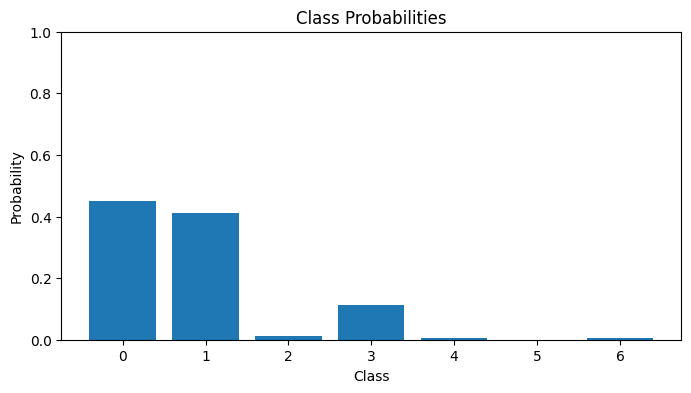

In [118]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    predicted = torch.argmax(test_outputs, 1)

misclassified_index = None
for i in range(len(Y_test)):
    if predicted[i] != Y_test[i]:
        misclassified_index = i
        break

if misclassified_index is not None:
    misclassified_example = X_test[misclassified_index]
    true_label = Y_test[misclassified_index].item()
    predicted_label = predicted[misclassified_index].item()

    class_probabilities = torch.softmax(test_outputs[misclassified_index], dim=0)
    class_probabilities = class_probabilities.tolist()

    classes = [0,1,2,3,4,5,6]
    plt.figure(figsize=(8, 4))
    plt.bar(classes, class_probabilities)
    plt.title('Class Probabilities')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.show()
else:
    print("No misclassified examples found in the testing data.")

## Task 6: Exploring the patterns in raw data

* Plot the crime incidents as a `scatter` plot using the corrdinates. Use the color property of each datapoint to indicate the day of the week. Is there a pattern in the plot?
* Now make a new scatter plot and use the color property of each datapoint to indicate the number of persons involved in the incident. Is there a pattern here?
* use numpy (or pandas if you like) to sort the number of crimes reported by the day of the week. What days are most frequent?


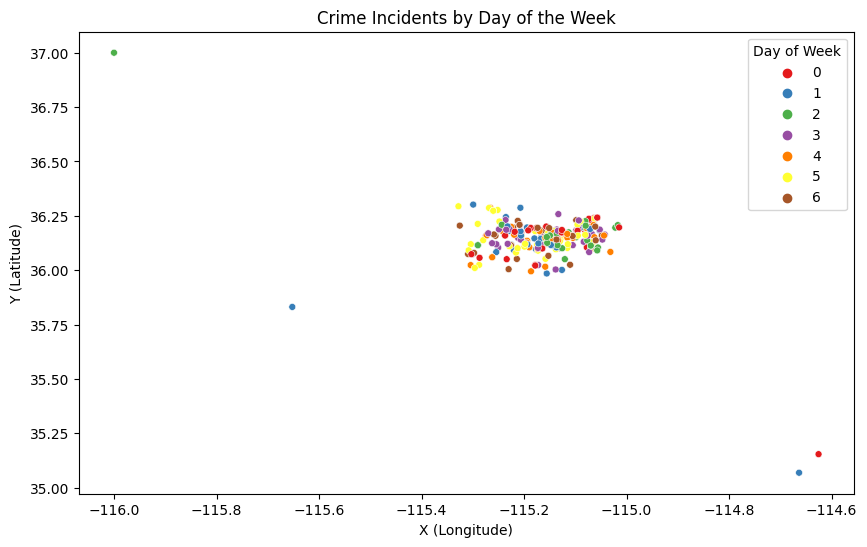

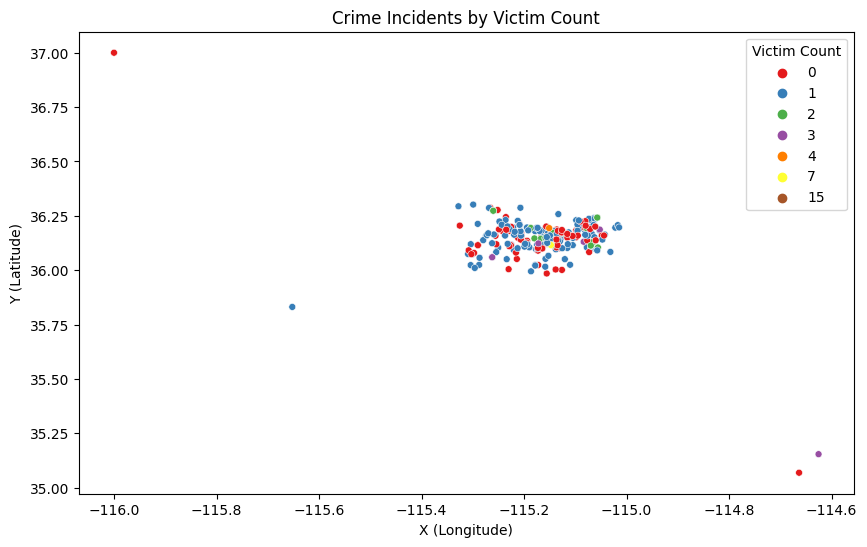

   DayOfWeek  Count
0          4     51
1          3     44
2          5     43
3          0     40
4          1     37
5          2     32
6          6     28


In [89]:

day_palette = sns.color_palette("Set1", df2['DayOfWeek'].nunique())
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', hue='DayOfWeek', data=df2[['X','Y','DayOfWeek']], palette=day_palette, s=25)
plt.title("Crime Incidents by Day of the Week")
plt.xlabel("X (Longitude)")
plt.ylabel("Y (Latitude)")
plt.legend(title='Day of Week')
plt.show()

# print((df['DayOfWeek'].values))
# print((df['VictimCount'].values))
victim_palette = sns.color_palette("Set1", df2['VictimCount'].nunique())
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', hue='VictimCount', data=df2[['X','Y','VictimCount']], palette=victim_palette, s=25)
plt.title("Crime Incidents by Victim Count")
plt.xlabel("X (Longitude)")
plt.ylabel("Y (Latitude)")
plt.legend(title='Victim Count')
plt.show()


day_counts = df['DayOfWeek'].value_counts().reset_index()
day_counts.columns = ['DayOfWeek', 'Count']

sorted_day_counts = day_counts.sort_values(by='Count', ascending=False)


print(sorted_day_counts)






*   From the first graph, it's difficult to figure out a pattern.
*   From the second graph, there is a pattern that a lot of crimes resulted in victims of 1 and 0.



*   We also observe that most crimes occured on day 4 of the week followed by 3 and 5.


